In [8]:
!pip install skimpy
!pip install summarytools

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

In [9]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from summarytools import dfSummary


## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [10]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 86.8MB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [11]:
df = pd.read_csv('Traffic Data.csv', parse_dates=['date_time'], index_col = 'date_time')
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


In [12]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,traffic_volume[float64],Mean (sd) : 3278.2 (1977.2)min < med < max:113.0 < 3430.0 < 16781.0IQR (CV) : 3699.2 (1.7),"5,754 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACNklEQVR4nO3dMY7aQBiG4X/iBRlQbCEk6LhApBSUHCKHTZsuBSfgBjQICRkjnHUwxmlCugQYL7E/9n1qZozQ60Egj8ZVVWVA231o+g0At3i59gLnXM/Mup7zH6uqevUcC/zxz1Cdc73RaPQliqKhz+T7/T5xzn31jZWbBBfXVtRuFEXD+Xz+Gsdxfs/EaZqGi8ViuN1uu2Z2dzBN3yRol6tf/WZmcRzn4/H4h8f8PY8xF43dJGifm0JtUkM3CVqGX/2QQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQ8NDnUcuy7JhZ5JzzGR6dz+fOG78liHpYqFmWdYqi+DydToMgCO56Qt/MrCiKsCzLT3mefzcznwen8UQeFurxeHwJw7A/m83yyWSS3Dt+tVoNl8tl/3Q6BT7Xr7mam7E5sFUevhVlMBh4bSVJksR7K0nd1dyMzYFt0/o9Uz7qruZsDmyfpwz1wnc1/43NgS3C31OQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQ8NQHotVR8yxVzlF9YzeFmqZpeO/Eh8MhNDPLsizcbDb9/zm+7rXX6/XHOmep7na7g3Pum5l5ncP6Tv2squqvn9cvfB/HoFI10IkAAAAASUVORK5CYII="">",20(0.1%)
2,temp[float64],Mean (sd) : 281.2 (12.7)min < med < max:243.4 < 281.8 < 310.1IQR (CV) : 19.9 (22.2),"3,901 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkUlEQVR4nO3dQYriQBSA4VeTVqJCggi68wIDvXDpIeawc4RZuJi1N3AnSlDMdDDG9KqhBxo1qcTUq/6/fZFa/HRi+pEyZVkK4LofXW8AeMRL1xtwlTFmICL9msvPZVm+Nbmf745Qv2CMGUwmk19RFI3rrD8ej4kx5jexNodQv9aPomi8XC7f4jjOqiw8HA7harUa7/f7vog8PVRf7wSEekMcx9l0Ov1XY+mg8c08wOc7AaH6Re2d4B5C9ZC2O8EjeD0FFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECY36OsZzQj67Xa6/J/biCUB1iO6Gf53lYFMXPLMv+iEideVRnEapbak/oi4hsNpvxer0eXi6XoI3NdYlQHVR3Qj9JEmcn9G3xYwoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUMHboZQu5zqLouiJSGSMeep1feZlqF3OdaZp2svz/HU+nwdBEFQa1fN5ntSWl6FKh3Od5/P5JQzD4WKxyGazWfKs6/rO11BFpNu5ztFoVPnaPs+T2vI6VFRj8Wz9obVTVQgVImL3bP2hzVNVCBUiYvdsLdL+qSqEiv/Uebb+pLVnbF74QwVChQqEChUIFSoQKlQgVKhAqFDB6feoFqN6jMt5xtlQbUb1GJfzj7OhisWoHuNy/nE5VBGpN6rHuJx/+DEFFQgVKhAqVGj1GZUTPtCU1kLlhA80qc2/qJzwgca0/nqKEz7QBH5MQQVChQrO/2cKelh+F+DmNwEIFY2w/S7AvW8C3A2VUTs8wua7AI98E+BmqE2M2u12u79V14qInE6nUEQkTdNwu90On7W2y2tr3ffn9W15B5vEgS3halZWAAAAAElFTkSuQmCC"">",0(0.0%)
3,rain_1h[float64],Mean (sd) : 0.0 (0.4)min < med < max:0.0 < 0.0 < 10.6IQR (CV) : 0.0 (0.1),87 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABaUlEQVR4nO3XT2oCMRiH4aSI6GYGETyMh+hhewhvIyUuqi1Iuuum1D/jov3R59km+cjiZYbU3nuBv+7pty8At5hd21BrXZZS5hPnf/TejxPPwpeLodZal+v1+nkYhtWU4YfD4bXW+iJWHnXtizofhmG13W6P4zie7hncWlvsdrvVfr+fl1KEykOu/vpLKWUcx9Nms3mbMH854Qx84zFFBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEmN2yqbW2uHdwa21xPp9npZSh1nr3xfh33nvvp58WPwF79y3yrjldnwAAAABJRU5ErkJggg=="">",0(0.0%)
4,snow_1h[float64],1. 0.0,"20,000 (100.0%)",,0(0.0%)
5,clouds_all[int64],Mean (sd) : 49.4 (39.6)min < med < max:0.0 < 75.0 < 92.0IQR (CV) : 89.0 (1.2),21 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACBElEQVR4nO3dUWriUBiG4e+0jsReJIjgJmYHLqKL7RLmwhW4A+8EkSNaw2hML0oHB6qNqcHzzbzPbTjmCC8hMcgf6roWkLqHe28AaKJ37w3g3xFCGEjqt1z+u67r3bmDhIqbCCEMRqPRc57nwzbr1+v1KoTwci5WQsWt9PM8H04mk11RFOU1C2OM2XQ6HS6Xy74kQkX3iqIox+Pxa4ulg0sHeZiChS+vqF3eIANNXQy16xtkoKmvrqid3iADTTV6mOrqBhloiocpWCBUWCBUWCBUWCBUWCBUWCBUWCBUWCBUWCBUWCBUWCBUWCBUWCBUWCBUWCBUWCB

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

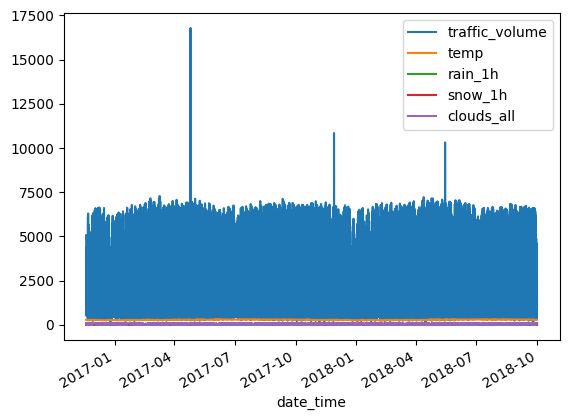

In [13]:
df.plot();

<Axes: >

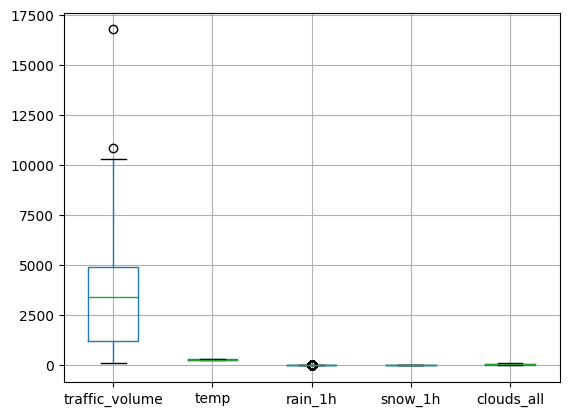

In [14]:
df.boxplot()

In [15]:
df_dup = df[df.duplicated()==True]
df_dup

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2018-01-30 02:00:00,249.0,255.420,0.0,0.0,1,Clear,sky is clear
2017-06-30 13:00:00,5263.0,296.950,0.0,0.0,1,Thunderstorm,thunderstorm
2016-12-19 00:00:00,420.0,254.220,0.0,0.0,1,Clear,sky is clear
2017-06-21 11:00:00,4808.0,295.010,0.0,0.0,40,Clouds,scattered clouds
2017-06-30 11:00:00,4725.0,294.520,0.0,0.0,1,Clear,sky is clear
2017-01-21 03:00:00,388.0,274.710,0.0,0.0,90,Fog,fog
2016-12-06 18:00:00,4520.0,267.890,0.0,0.0,90,Snow,light snow
2017-10-30 12:00:00,4911.0,275.720,0.0,0.0,90,Mist,mist
2017-02-13 15:00:00,5568.0,280.650,0.0,0.0,1,Clear,sky is clear


## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()
df['traffic_volume'] = imputer.fit_transform(df[['traffic_volume']])

In [17]:
df.index.duplicated().sum()

3731

In [18]:
df = df[~df.index.duplicated()]

<Axes: xlabel='date_time'>

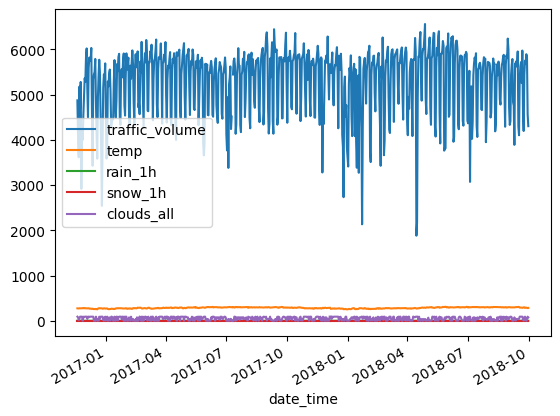

In [19]:
df_D = df.asfreq('D')
df_D.plot()

<Axes: xlabel='date_time'>

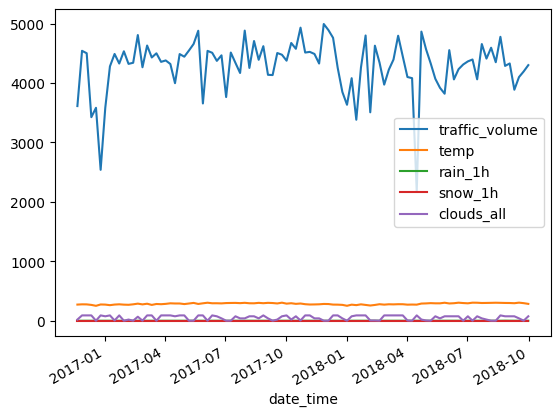

In [20]:
df_W = df.asfreq('W')
df_W.plot()

<Axes: xlabel='date_time'>

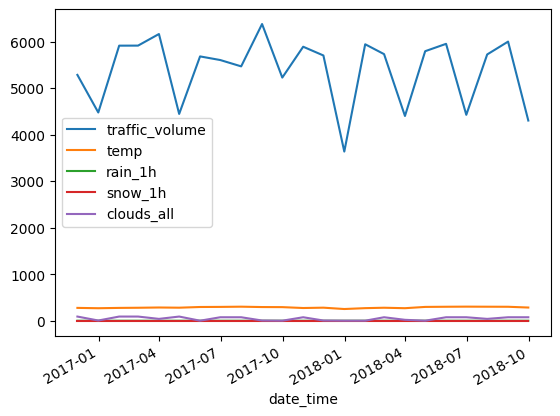

In [21]:
df_M = df.asfreq('M')
df_M.plot()

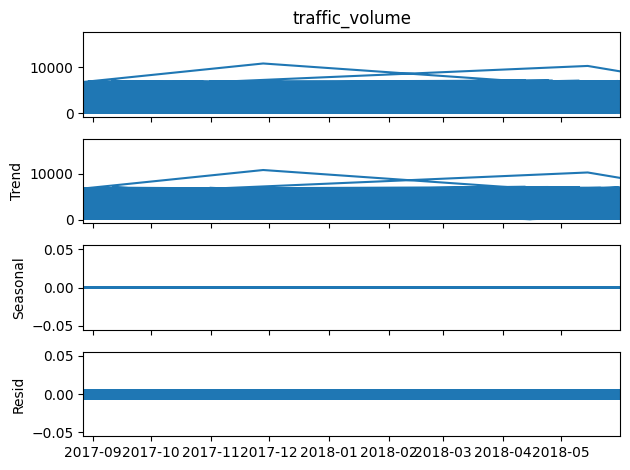

In [22]:
seasonal_decompose(df['traffic_volume'], period=1).plot();

In [23]:
df.sort_index(inplace=True)

<ipython-input-23-937e54797a99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_index(inplace=True)


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [24]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)

<ipython-input-24-1ee6ae8f28d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prev_traffic_volume'] = df['traffic_volume'].shift(1)


In [25]:
df['prev_traffic_volume'].bfill(inplace=True)

<ipython-input-25-ffabd8ed0f04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prev_traffic_volume'].bfill(inplace=True)


In [26]:
df['prev_traffic_volume'].isna().sum()

0

In [27]:
df['traffic_volume_diff'] = df['traffic_volume'].diff()

<ipython-input-27-4320e5ec8fc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_volume_diff'] = df['traffic_volume'].diff()


In [28]:
df['traffic_volume_diff'].head()

,traffic_volume_diff
date_time,
2016-11-18 15:00:00,NaN
2016-11-18 16:00:00,202.0
2016-11-18 17:00:00,-746.0
2016-11-18 18:00:00,-842.0
2016-11-18 19:00:00,-962.0


In [29]:
df['traffic_volume_diff'].fillna(0, inplace=True)

<ipython-input-29-2c7b439d8678>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_volume_diff'].fillna(0, inplace=True)


In [30]:
df['day_of_the_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day_of_the_year'] = df.index.dayofyear

<ipython-input-30-ecc9f8f813b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_the_week'] = df.index.dayofweek
<ipython-input-30-ecc9f8f813b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
<ipython-input-30-ecc9f8f813b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [31]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,traffic_volume_diff,day_of_the_week,month,day_of_the_year
date_time,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,4872.0,0.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,4872.0,202.0,4,11,323
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Mist,mist,5074.0,-746.0,4,11,323
2016-11-18 18:00:00,3486.0,273.59,0.0,0.0,90,Snow,heavy snow,4328.0,-842.0,4,11,323
2016-11-18 19:00:00,2524.0,273.58,0.0,0.0,90,Mist,mist,3486.0,-962.0,4,11,323


In [32]:
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,traffic_volume_diff,day_of_the_week,month,day_of_the_year
date_time,,,,,,,,,,,,
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,3947.0,-404.0,6,9,273
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,3543.0,-762.0,6,9,273
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2781.0,-622.0,6,9,273
2018-09-30 22:00:00,1450.0,282.09,0.0,0.0,90,Clouds,overcast clouds,2159.0,-709.0,6,9,273
2018-09-30 23:00:00,954.0,282.12,0.0,0.0,90,Clouds,overcast clouds,1450.0,-496.0,6,9,273


In [33]:
df.sample(5)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,traffic_volume_diff,day_of_the_week,month,day_of_the_year
date_time,,,,,,,,,,,,
2018-05-16 04:00:00,895.0,284.82,0.0,0.0,1,Clear,sky is clear,367.0,528.0,2,5,136
2017-09-15 03:00:00,366.0,295.48,0.0,0.0,40,Clouds,scattered clouds,333.0,33.0,4,9,258
2018-03-17 16:00:00,4708.0,280.86,0.0,0.0,5,Clear,sky is clear,5217.0,-509.0,5,3,76
2017-06-18 23:00:00,1886.0,290.68,0.0,0.0,1,Clear,sky is clear,2374.0,-488.0,6,6,169
2018-05-23 22:00:00,2028.0,296.89,0.0,0.0,75,Clouds,broken clouds,2888.0,-860.0,2,5,143


In [34]:
df.drop(columns=['weather_main', 'weather_description'], inplace=True)

<ipython-input-34-beec2adebb94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['weather_main', 'weather_description'], inplace=True)


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [35]:
from sklearn.model_selection import train_test_split

train_set, temp_set = train_test_split(df, test_size=0.3, shuffle=False)
val_set, test_set = train_test_split(temp_set, test_size=0.5, shuffle=False)

In [36]:
train_set.shape, val_set.shape, test_set.shape

((11388, 10), (2440, 10), (2441, 10))

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_set = scaler.fit_transform(train_set)
val_set = scaler.transform(val_set)
test_set = scaler.transform(test_set)

In [38]:
train_set, val_set, test_set

(array([[0.28551716, 0.48231966, 0.        , ..., 0.66666667, 0.90909091,
         0.88219178],
        [0.29763619, 0.47854785, 0.        , ..., 0.66666667, 0.90909091,
         0.88219178],
        [0.25287977, 0.47509037, 0.        , ..., 0.66666667, 0.90909091,
         0.88219178],
        ...,
        [0.18658507, 0.48341977, 0.        , ..., 0.83333333, 0.18181818,
         0.18630137],
        [0.20932325, 0.47854785, 0.        , ..., 0.83333333, 0.18181818,
         0.18630137],
        [0.23560115, 0.47509037, 0.        , ..., 0.83333333, 0.18181818,
         0.18630137]]),
 array([[0.13918886, 0.4711614 , 0.        , ..., 0.83333333, 0.18181818,
         0.18630137],
        [0.09293257, 0.47084708, 0.        , ..., 1.        , 0.18181818,
         0.1890411 ],
        [0.05171586, 0.47226151, 0.        , ..., 1.        , 0.18181818,
         0.1890411 ],
        ...,
        [0.0312575 , 0.80088009, 0.        , ..., 0.5       , 0.45454545,
         0.46849315],
        [0.0

In [39]:
from tensorflow.keras.utils import timeseries_dataset_from_array
import tensorflow as tf
import numpy as np
import keras
import random

In [40]:
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
keras.utils.set_random_seed(SEED)
random.seed(SEED)

In [41]:
window = 24
train_x_y = timeseries_dataset_from_array(train_set, targets=train_set[window: , 0], sequence_length=window)
val_x_y = timeseries_dataset_from_array(val_set, targets=val_set[window: ,0], sequence_length=window)
test_x_y = timeseries_dataset_from_array(test_set, targets=test_set[window: , 0], sequence_length=window)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Conv1D, Dropout

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [43]:
model = Sequential([
    LSTM(units=50, activation='tanh', return_sequences=True),
    LSTM(units=50, activation='tanh', return_sequences=True),
    Dropout(0.5),
    LSTM(units=50, activation='tanh', return_sequences=True),
    LSTM(units=20, activation='tanh'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(train_x_y, epochs=50, validation_data=val_x_y)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0180 - mae: 0.1120 - val_loss: 0.0084 - val_mae: 0.0707
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0082 - mae: 0.0716 - val_loss: 0.0072 - val_mae: 0.0669
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0059 - mae: 0.0596 - val_loss: 0.0060 - val_mae: 0.0621
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0043 - mae: 0.0499 - val_loss: 0.0042 - val_mae: 0.0500
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0038 - mae: 0.0462 - val_loss: 0.0035 - val_mae: 0.0432
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0034 - mae: 0.0419 - val_loss: 0.0031 - val_mae: 0.0396
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0031 - mae: 0.0400 - val_loss: 0.0025 - val_mae: 0.0354
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0026 - mae: 0.0356 - val_loss: 0.0021 - val_mae: 0.0307
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.00

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [45]:
predictions = model.predict(test_x_y)
predictions

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


array([[0.02372782],
       [0.0584861 ],
       [0.16009225],
       ...,
       [0.13817486],
       [0.10926895],
       [0.07280438]], dtype=float32)

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [46]:
loss, mae = model.evaluate(test_x_y)
print('Model 1 Loss: ', loss)
print('Model 1 MAE: ', mae)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.4820e-04 - mae: 0.0194
Model 1 Loss:  0.0013828373048454523
Model 1 MAE:  0.02285212278366089


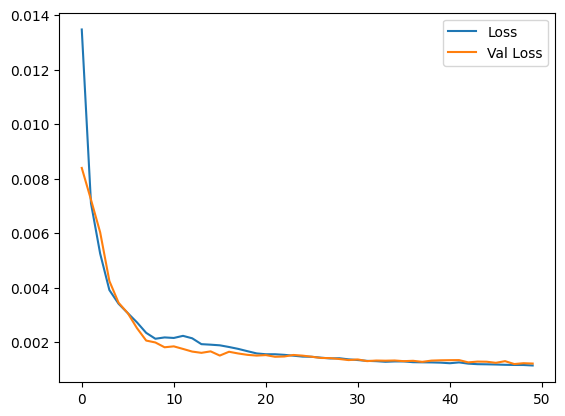

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

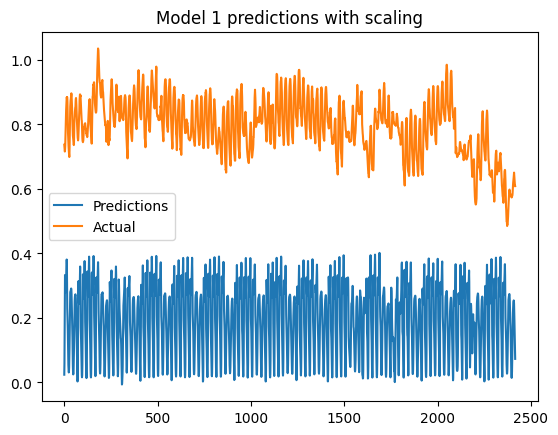

In [48]:
plt.plot(predictions, label='Predictions')
plt.plot(test_set[window: , 1], label='Actual')
plt.title('Model 1 predictions with scaling')
plt.legend()
plt.show()

In [49]:
predictions_inv_scal = scaler.inverse_transform(predictions.reshape(-1, 1))
test_set_inv_scal = scaler.inverse_transform(test_set)

ValueError: non-broadcastable output operand with shape (2417,1) doesn't match the broadcast shape (2417,10)

In [ ]:
plt.plot(predictions_inv_scal, label='Predictions')
plt.plot(test_set_inv_scal[window: , 1], label='Actual')
plt.title('Model 1 predictions without scaling')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [50]:
model2 = Sequential([
    GRU(units=50, activation='tanh', return_sequences=True),
    GRU(units=50, activation='tanh', return_sequences=True),
    Dropout(0.5),
    GRU(units=50, activation='tanh', return_sequences=True),
    GRU(units=20, activation='tanh'),
    Dense(units=1)
])

model2.compile(optimizer='adam', loss='mse', metrics=['mae'])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
history2 = model2.fit(train_x_y, epochs=50, validation_data=val_x_y)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0263 - mae: 0.1278 - val_loss: 0.0086 - val_mae: 0.0737
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0094 - mae: 0.0770 - val_loss: 0.0068 - val_mae: 0.0606
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0076 - mae: 0.0682 - val_loss: 0.0061 - val_mae: 0.0545
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0053 - mae: 0.0564 - val_loss: 0.0036 - val_mae: 0.0432
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0036 - mae: 0.0457 - val_loss: 0.0025 - val_mae: 0.0363
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0026 - mae: 0.0390 - val_loss: 0.0019 - val_mae: 0.0301
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0021 - mae: 0.0347 - val_loss: 0.0015 - val_mae: 0.0267
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0022 - mae: 0.0359 - val_loss: 0.0018 - val_mae: 0.0305
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.002

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [52]:
predictions2 = model2.predict(test_x_y)
predictions2

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


array([[0.01672259],
       [0.04804365],
       [0.13337696],
       ...,
       [0.11939137],
       [0.08962145],
       [0.04923774]], dtype=float32)

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [53]:
loss, mae = model2.evaluate(test_x_y)
print('Model 2 Loss: ', loss)
print('Model 2 MAE: ', mae)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.4419e-04 - mae: 0.0147
Model 2 Loss:  0.0006107038352638483
Model 2 MAE:  0.016784828156232834


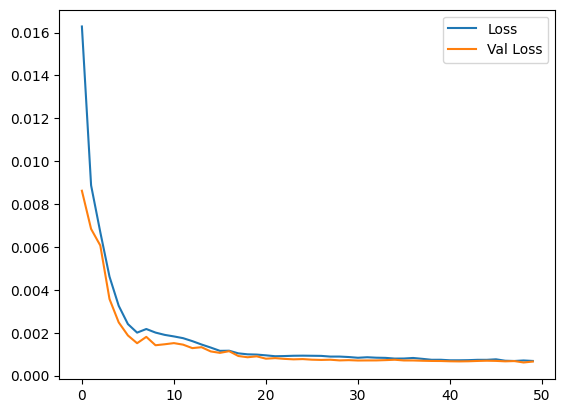

In [54]:
plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

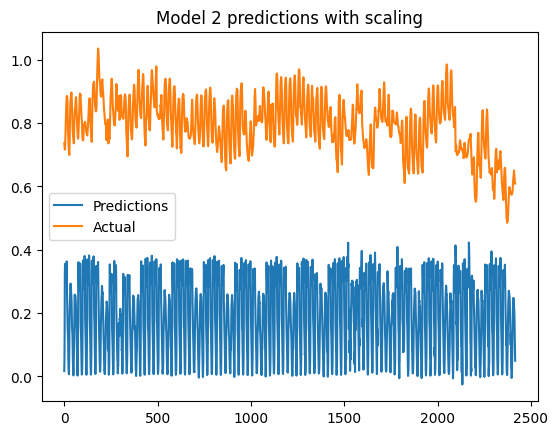

In [55]:
plt.plot(predictions2, label='Predictions')
plt.plot(test_set[window: , 1], label='Actual')
plt.title('Model 2 predictions with scaling')
plt.legend()
plt.show()

In [56]:
predictions2.shape

(2417, 1)

In [73]:
target_min = scaler.data_min_[-1]
target_max = scaler.data_max_[-1]
predictions2_inv_scal = predictions2 * (target_max - target_min) + target_min
test_set_inv_scal = test_set[:, -1] * (target_max - target_min) + target_min

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

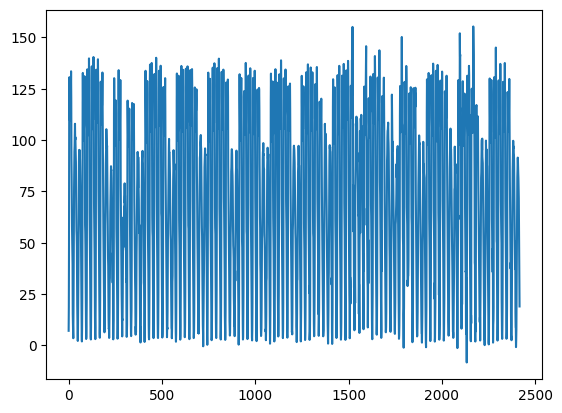

In [80]:
plt.plot(predictions2_inv_scal, label='Predictions')
plt.plot(test_set_inv_scal[:, 0], label='Actual')
plt.legend()
plt.show()

#Model 3

In [70]:
model3 = Sequential([
    Conv1D(32, activation='relu', kernel_size=24, strides=3),
    GRU(units=50, activation='tanh', return_sequences=True),
    GRU(units=50, activation='tanh', return_sequences=True),
    Dropout(0.5),
    GRU(units=50, activation='tanh', return_sequences=True),
    GRU(units=20, activation='tanh'),
    Dense(units=1)
])

model3.compile(optimizer='adam', loss='mse', metrics=['mae'])
model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_8 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_9 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_10 (GRU)                         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_11 (GRU)                         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [81]:
history3 = model3.fit(train_x_y, epochs=100, validation_data=val_x_y)

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0176 - mae: 0.1074 - val_loss: 0.0054 - val_mae: 0.0551
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0060 - mae: 0.0603 - val_loss: 0.0033 - val_mae: 0.0445
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0050 - mae: 0.0545 - val_loss: 0.0147 - val_mae: 0.0988
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0091 - mae: 0.0756 - val_loss: 0.0031 - val_mae: 0.0428
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0031 - mae: 0.0414 - val_loss: 0.0024 - val_mae: 0.0360
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0034 - mae: 0.0441 - val_loss: 0.0063 - val_mae: 0.0621
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0060 - mae: 0.0606 - val_loss: 0.0043 - val_mae: 0.0497
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0045 - mae: 0.0522 - val_loss: 0.0028 - val_mae: 0.0370
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - lo

In [82]:
predictions3 = model3.predict(test_x_y)
predictions3

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


array([[0.019642  ],
       [0.03623544],
       [0.19982173],
       ...,
       [0.16223842],
       [0.12513235],
       [0.082065  ]], dtype=float32)

In [83]:
loss, mae = model3.evaluate(test_x_y)
print('Model 3 Loss: ', loss)
print('Model 3 MAE: ', mae)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0014 - mae: 0.0258
Model 3 Loss:  0.002150776097550988
Model 3 MAE:  0.030277172103524208


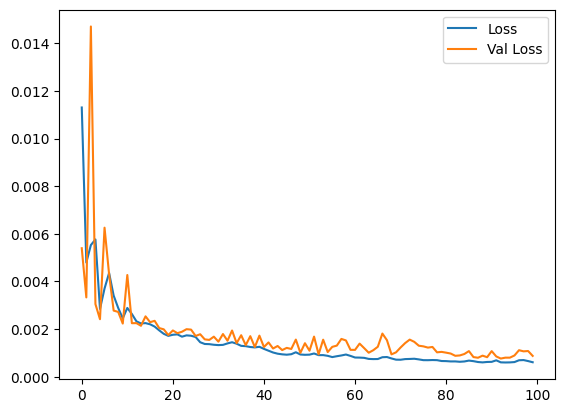

In [84]:
plt.plot(history3.history['loss'], label='Loss')
plt.plot(history3.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

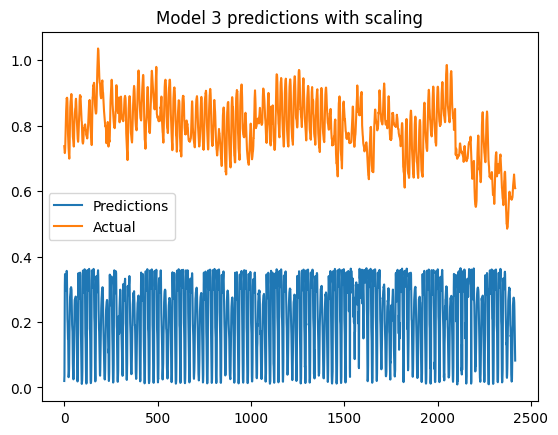

In [85]:
plt.plot(predictions3, label='Predictions')
plt.plot(test_set[window: , 1], label='Actual')
plt.title('Model 3 predictions with scaling')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1.   I used Iterative Imputer to fill the missing values, then I droped the duplicate indices, then i sorted the index. after splitting the data i performed MinMaxScaler because the data is not normally distributed.
2.   I shifted the traffic volume by 1 day so the model has a veiw of the day and the day before. then I added a new column for the diffrence, i also extracted diffrent features from the index(date) which are the day of the week, the month, and the day of the year, so trends can be found since the data started mid month.
3.   So i trained three diffrent models, the first model is LSTM I add three hidden layers other than the input layer each with 50 neurons and the last with 20 and the activation function is tanh, the output layer is dense with one unit because i have one output value. the loss was good (9.4820e-04) but the predictions where sinking under the actual values. The second model, have a similar architecture but it was GRU. The third model was exactly the same as the second but with a Conv1D input layer that have a stride of 3(tried 12, 6, 3 but 3 had the best outcome) and a kernal of 24 which is equal to the window size i used in the other models.
4.   I chose Adam as the optimizer, a 24 window size because the data is collected hourly so i had a window size of 24 so the model have a view on a full day, as for the number of epochs for the first two models i used 50 and it was enough, i tried the same for the third model but the training was inconsistent so i increased the number of epochs to 100 to get a more consistent training and validation. I tested with diffrent values these gave the best performance.
5.   I used MSE for the loss so the error will have more weight on the gradient, but for the metric i used MAE which is better for me to understand the amount of error.
6.   I set the SEED to 42 so all the models will have the same seed value.
7.   My models did not encounter any underfitting or overfitting but the predictions are all sinking.
8.   I would perform ARIMA maybe it will work better, I will also drop some unnecessary columns and use only effective columns that help the models. I would also maybe perform exponential smoothing.







